In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [88]:
# Load Training/Validation Logs
log_dir = './logs'
teacher_train = pd.read_pickle(f'{log_dir}/teacher_mnist/train.pkl')
teacher_valid = pd.read_pickle(f'{log_dir}/teacher_mnist/valid.pkl')

student_base_train = pd.read_pickle(f'{log_dir}/student_base_mnist/train.pkl')
student_base_valid = pd.read_pickle(f'{log_dir}/student_base_mnist/valid.pkl')

distill_t150_T5_train = pd.read_pickle(f'{log_dir}/distill_time150_temp5/train.pkl')
distill_t150_T5_valid = pd.read_pickle(f'{log_dir}/distill_time150_temp5/valid.pkl')
distill_t150_T20_train = pd.read_pickle(f'{log_dir}/distill_time150_temp20/train.pkl')
distill_t150_T20_valid = pd.read_pickle(f'{log_dir}/distill_time150_temp20/valid.pkl')
distill_t150_T100_train = pd.read_pickle(f'{log_dir}/distill_time150_temp100/train.pkl')
distill_t150_T100_valid = pd.read_pickle(f'{log_dir}/distill_time150_temp100/valid.pkl')

distill_t300_T5_train = pd.read_pickle(f'{log_dir}/distill_time300_temp5/train.pkl')
distill_t300_T5_valid = pd.read_pickle(f'{log_dir}/distill_time300_temp5/valid.pkl')
distill_t300_T20_train = pd.read_pickle(f'{log_dir}/distill_time300_temp20/train.pkl')
distill_t300_T20_valid = pd.read_pickle(f'{log_dir}/distill_time300_temp20/valid.pkl')
distill_t300_T100_train = pd.read_pickle(f'{log_dir}/distill_time300_temp100/train.pkl')
distill_t300_T100_valid = pd.read_pickle(f'{log_dir}/distill_time300_temp100/valid.pkl')


test_train = pd.read_pickle(f'{log_dir}/test_1/train.pkl')
test_valid = pd.read_pickle(f'{log_dir}/test_1/valid.pkl')

In [174]:
def plot_backprop_acc():
    fig = plt.figure(figsize=(6,7.5))
    fig.suptitle('SNN Backpropagation', fontsize=15)

    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    teacher_train_acc       = teacher_train['acc'].to_numpy()
    teacher_train_acc_first = test_train['acc_first'].to_numpy()
    teacher_valid_acc       = teacher_valid['acc'].to_numpy()
    teacher_valid_acc_first = test_valid['acc_first'].to_numpy()

    student_base_train_acc       = student_base_train['acc'].to_numpy()
    student_base_train_acc_first = student_base_train['acc_first'].to_numpy()
    student_base_valid_acc       = student_base_valid['acc'].to_numpy()
    student_base_valid_acc_first = student_base_valid['acc_first'].to_numpy()
    
    ax1.plot(teacher_train_acc, label="Teacher (All Spikes)")
    ax1.plot(student_base_train_acc, label="Student Base (All Spikes)")
    ax1.plot(teacher_train_acc_first, label="Teacher (First Spike)")
    ax1.plot(student_base_train_acc_first, label="Student Base (First Spike)")
    
    ax1.title.set_text('Training Accuracy')
    ax1.legend(loc="lower right")
    ax1.set_xlabel('Epochs')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax1.set_ylim(0.5,1)
    
    ax2.plot(teacher_valid_acc, label="Teacher (All Spikes)")
    ax2.plot(student_base_valid_acc, label="Student Base (All Spikes)")
    ax2.plot(teacher_valid_acc_first, label="Teacher (First Spike)")
    ax2.plot(student_base_valid_acc_first, label="Student Base (First Spike)")

    ax2.title.set_text('Validation Accuracy')
    ax2.legend(loc="lower right")
    ax2.set_xlabel('Epochs')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax2.set_ylim(0.5,1)
    
    fig.tight_layout()
    fig.savefig(f'{log_dir}/backprop_accuracy.jpg')
    fig.show()
    
def plot_distill_acc():
    fig = plt.figure(figsize=(6,15))
    fig.suptitle('SNN Distillation', fontsize=15)

    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    
    distill_t150_T5_train_acc         = distill_t150_T5_train['acc'].to_numpy()
    distill_t150_T5_train_acc_first   = distill_t150_T5_train['acc_first'].to_numpy()
    distill_t150_T5_valid_acc         = distill_t150_T5_valid['acc'].to_numpy()
    distill_t150_T5_valid_acc_first   = distill_t150_T5_valid['acc_first'].to_numpy()

    distill_t150_T20_train_acc        = distill_t150_T20_train['acc'].to_numpy()
    distill_t150_T20_train_acc_first  = distill_t150_T20_train['acc_first'].to_numpy()
    distill_t150_T20_valid_acc        = distill_t150_T20_valid['acc'].to_numpy()
    distill_t150_T20_valid_acc_first  = distill_t150_T20_valid['acc_first'].to_numpy()
    
    distill_t150_T100_train_acc       = distill_t150_T100_train['acc'].to_numpy()
    distill_t150_T100_train_acc_first = distill_t150_T100_train['acc_first'].to_numpy()
    distill_t150_T100_valid_acc       = distill_t150_T100_valid['acc'].to_numpy()
    distill_t150_T100_valid_acc_first = distill_t150_T100_valid['acc_first'].to_numpy()
    
    distill_t300_T5_train_acc         = distill_t300_T5_train['acc'].to_numpy()
    distill_t300_T5_train_acc_first   = distill_t300_T5_train['acc_first'].to_numpy()
    distill_t300_T5_valid_acc         = distill_t300_T5_valid['acc'].to_numpy()
    distill_t300_T5_valid_acc_first   = distill_t300_T5_valid['acc_first'].to_numpy()
    
    distill_t300_T20_train_acc        = distill_t300_T20_train['acc'].to_numpy()
    distill_t300_T20_train_acc_first  = distill_t300_T20_train['acc_first'].to_numpy()
    distill_t300_T20_valid_acc        = distill_t300_T20_valid['acc'].to_numpy()
    distill_t300_T20_valid_acc_first  = distill_t300_T20_valid['acc_first'].to_numpy()
    
    distill_t300_T100_train_acc       = distill_t300_T100_train['acc'].to_numpy()
    distill_t300_T100_train_acc_first = distill_t300_T100_train['acc_first'].to_numpy()
    distill_t300_T100_valid_acc       = distill_t300_T100_valid['acc'].to_numpy()
    distill_t300_T100_valid_acc_first = distill_t300_T100_valid['acc_first'].to_numpy()
        
    ax1.plot(distill_t150_T5_train_acc, label="Temperature = 5 (All Spikes)")
    ax1.plot(distill_t150_T20_train_acc, label="Temperature = 20 (All Spikes)")
    ax1.plot(distill_t150_T100_train_acc, label="Temperature = 100 (All Spikes)")

    ax1.plot(distill_t150_T5_train_acc_first, label="Temperature = 5 (First Spike)")
    ax1.plot(distill_t150_T20_train_acc_first, label="Temperature = 20 (First Spike)")
    ax1.plot(distill_t150_T100_train_acc_first, label="Temperature = 100 (First Spike)")
    
    ax1.title.set_text('Training Accuracy: 150 Inference Timesteps')
    ax1.legend(loc="lower right")
    ax1.set_xlabel('Epochs')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax1.set_ylim(0.5,1)

    ax2.plot(distill_t150_T5_valid_acc, label="Temperature = 5 (All Spikes)")
    ax2.plot(distill_t150_T20_valid_acc, label="Temperature = 20 (All Spikes)")
    ax2.plot(distill_t150_T100_valid_acc, label="Temperature = 100 (All Spikes)")

    ax2.plot(distill_t150_T5_valid_acc_first, label="Temperature = 5 (First Spike)")
    ax2.plot(distill_t150_T20_valid_acc_first, label="Temperature = 20 (First Spike)")
    ax2.plot(distill_t150_T100_valid_acc_first, label="Temperature = 100 (First Spike)")

    ax2.title.set_text('Validation Accuracy: 150 Inference Timesteps')
    ax2.legend(loc="lower right")
    ax2.set_xlabel('Epochs')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax2.set_ylim(0.5,1)

    ax3.plot(distill_t300_T5_train_acc, label="Temperature = 5 (All Spikes)")
    ax3.plot(distill_t300_T20_train_acc, label="Temperature = 20 (All Spikes)")
    ax3.plot(distill_t300_T100_train_acc, label="Temperature = 100 (All Spikes)")

    ax3.plot(distill_t300_T5_train_acc_first, label="Temperature = 5 (First Spike)")
    ax3.plot(distill_t300_T20_train_acc_first, label="Temperature = 20 (First Spike)")
    ax3.plot(distill_t300_T100_train_acc_first, label="Temperature = 100 (First Spike)")
    
    ax3.title.set_text('Training Accuracy: 300 Inference Timesteps')
    ax3.legend(loc="lower right")
    ax3.set_xlabel('Epochs')
    ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax3.set_ylim(0.5,1)
    
    ax4.plot(distill_t300_T5_valid_acc, label="Temperature = 5 (All Spikes)")
    ax4.plot(distill_t300_T20_valid_acc, label="Temperature = 20 (All Spikes)")
    ax4.plot(distill_t300_T100_valid_acc, label="Temperature = 100 (All Spikes)")

    ax4.plot(distill_t300_T5_valid_acc_first, label="Temperature = 5 (First Spike)")
    ax4.plot(distill_t300_T20_valid_acc_first, label="Temperature = 20 (First Spike)")
    ax4.plot(distill_t300_T100_valid_acc_first, label="Temperature = 100 (First Spike)")

    ax4.title.set_text('Validation Accuracy: 300 Inference Timesteps')
    ax4.legend(loc="lower right")
    ax4.set_xlabel('Epochs')
    ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))    
    ax4.set_ylim(0.5,1)

    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    fig.savefig(f'{log_dir}/distillation_accuracy.jpg')
    fig.show()

def plot_distill_loss():
    fig = plt.figure(figsize=(6,7.5))
    fig.suptitle('Knowledge Distillation Losses', fontsize=15)

    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    names_time150 = ['distill_time150_temp5', 'distill_time150_temp20', 'distill_time150_temp100']
    distill_loss_time150 = np.asarray([[np.load(f'{log_dir}/{name}/distill_loss_{name}_epoch{epoch}.npy') for epoch in range(10)] for name in names_time150])
    student_loss_time150 = np.asarray([[np.load(f'{log_dir}/{name}/student_loss_{name}_epoch{epoch}.npy') for epoch in range(10)] for name in names_time150])

    names_time300 = ['distill_time300_temp5', 'distill_time300_temp20', 'distill_time300_temp100']
    distill_loss_time300 = np.asarray([[np.load(f'{log_dir}/{name}/distill_loss_{name}_epoch{epoch}.npy') for epoch in range(5)] for name in names_time300])
    student_loss_time300 = np.asarray([[np.load(f'{log_dir}/{name}/student_loss_{name}_epoch{epoch}.npy') for epoch in range(5)] for name in names_time300])    

    ax1.plot(student_loss_time150[0], label="Temperature = 5 (Student Loss)")
    ax1.plot(student_loss_time150[1], label="Temperature = 20 (Student Loss)")
    ax1.plot(student_loss_time150[2], label="Temperature = 100 (Student Loss)")

    ax1.plot(distill_loss_time150[0], label="Temperature = 5 (Distillation Loss)")
    ax1.plot(distill_loss_time150[1], label="Temperature = 20 (Distillation Loss)")
    ax1.plot(distill_loss_time150[2], label="Temperature = 100 (Distillation Loss)")

    ax1.title.set_text('Losses: 150 Inference Timesteps')
    ax1.legend(loc="upper right")
    ax1.set_xlabel('Epochs')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax2.plot(student_loss_time300[0], label="Temperature = 5 (Student Loss)")
    ax2.plot(student_loss_time300[1], label="Temperature = 20 (Student Loss)")
    ax2.plot(student_loss_time300[2], label="Temperature = 100 (Student Loss)")

    ax2.plot(distill_loss_time300[0], label="Temperature = 5 (Distillation Loss)")
    ax2.plot(distill_loss_time300[1], label="Temperature = 20 (Distillation Loss)")
    ax2.plot(distill_loss_time300[2], label="Temperature = 100 (Distillation Loss)")
    
    ax2.title.set_text('Losses: 300 Inference Timesteps')
    ax2.legend(loc="upper right")
    ax2.set_xlabel('Epochs')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    fig.savefig(f'{log_dir}/distillation_loss.jpg')
    fig.show()    

<ipython-input-174-25ffff240b5c>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


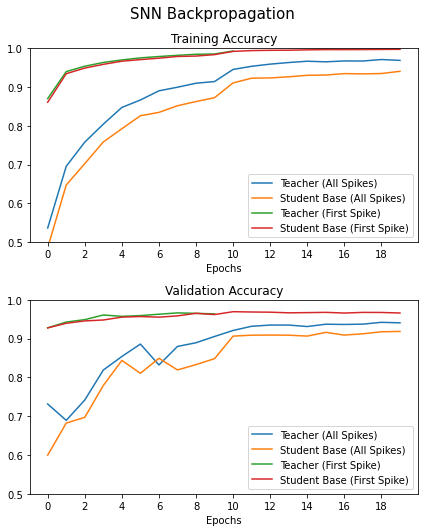

In [175]:
plot_backprop_acc()

<ipython-input-174-25ffff240b5c>:142: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


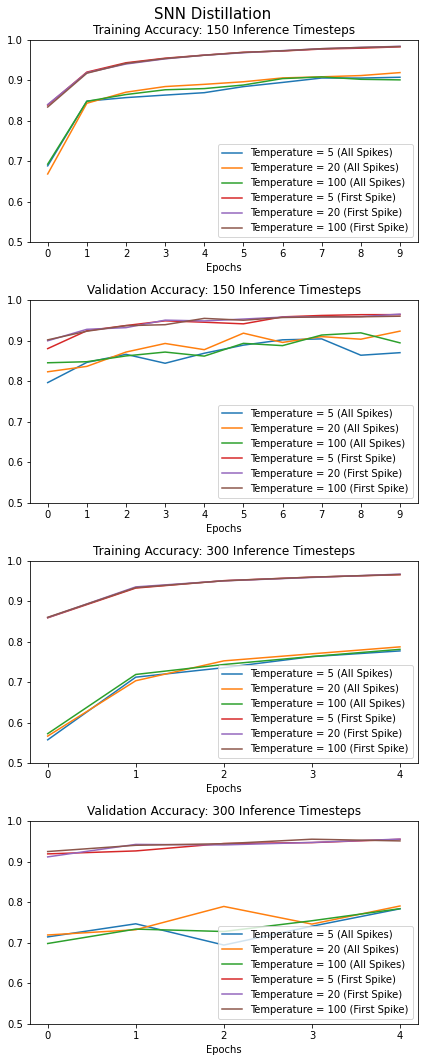

In [176]:
plot_distill_acc()

<ipython-input-174-25ffff240b5c>:188: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


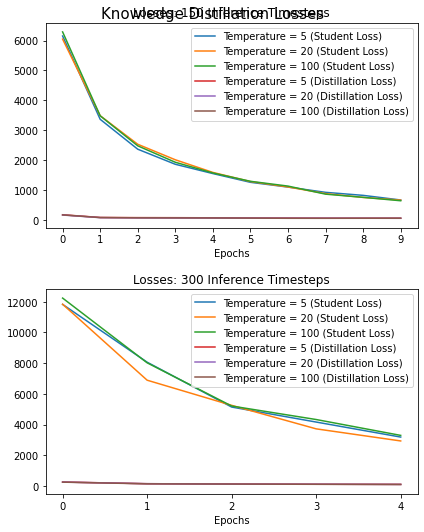

In [177]:
plot_distill_loss()